In [ ]:
#importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/flight_data_1.csv')

In [ ]:
df = pd.DataFrame(data)

print("##  Initial Historical Flight Data")
print(df)
print("-" * 40)

##  Initial Historical Flight Data
     Flight            Carrier DepTime Delay
0     SG973           SpiceJet   19:15   Yes
1     AI911          Air India   12:20    No
2     6E388             IndiGo   06:40    No
3     AI951          Air India   11:40    No
4     AI463          Air India   01:10    No
...     ...                ...     ...   ...
1265  6E871             IndiGo   05:25    No
1266  IX537  Air India Express   15:20    No
1267  AI951          Air India   11:55    No
1268  AI387          Air India   08:10    No
1269  IX249  Air India Express   12:15    No

[1270 rows x 4 columns]
----------------------------------------


##2. Data Preprocessing

In [ ]:
# Convert 'DepTime' to a numerical feature (hour of the day)
df['DepHour'] = pd.to_datetime(df['DepTime'], format='%H:%M').dt.hour

# Map the target variable 'Delay' to binary format (1 for 'Yes', 0 for 'No')
df['Delay'] = df['Delay'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define features (X) and target (y)
X = df[['Carrier', 'DepHour']]
y = df['Delay']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define the preprocessing steps for different column types
# 'Carrier' is a categorical feature, so we use OneHotEncoder.
# 'DepHour' is numerical and can be passed through without changes ('passthrough').
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Carrier']),
        ('num', 'passthrough', ['DepHour'])
    ])



##3. Classification Model Training

In [ ]:
# Create a pipeline that first preprocesses the data and then applies the logistic regression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the entire dataset
model_pipeline.fit(X_train, y_train)
print(" Model training complete.")

 Model training complete.


##4. Model Evaluation

 Model Evaluation
Accuracy: 0.94

**Confusion Matrix:**
(Rows: Actual, Columns: Predicted)
[[288   7]
 [ 15  71]]


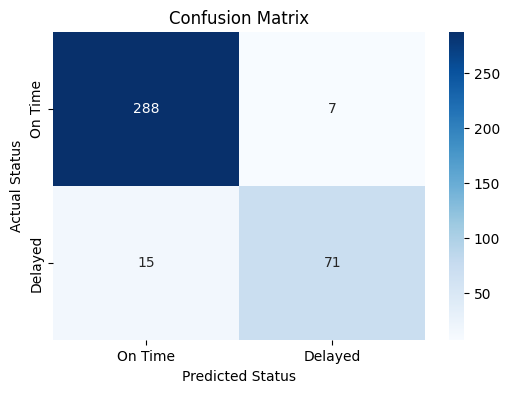

In [ ]:
# Make predictions on the training data to evaluate
y_pred = model_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f" Model Evaluation")
print(f"Accuracy: {accuracy:.2f}")
print("\n**Confusion Matrix:**")
print("(Rows: Actual, Columns: Predicted)")
print(conf_matrix)

# For better visualization of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status')
plt.title('Confusion Matrix')
plt.show()

##5. Prediction for New Flights

In [ ]:
def predict_flight_delay(carrier, dep_time):

    # Create a DataFrame from the new input
    new_flight_data = pd.DataFrame({
        'Carrier': [carrier],
        'DepTime': [dep_time]
    })

    # Apply the same time feature extraction
    new_flight_data['DepHour'] = pd.to_datetime(new_flight_data['DepTime'], format='%H:%M').dt.hour

    # Select the features for prediction
    X_new = new_flight_data[['Carrier', 'DepHour']]

    # Predict the status (0 or 1)
    prediction_code = model_pipeline.predict(X_new)[0]

    # Predict the probabilities [P(No Delay), P(Delay)]
    prediction_proba = model_pipeline.predict_proba(X_new)[0]

    # Determine the status and format the output
    status = "Delayed" if prediction_code == 1 else "On Time"
    delay_probability = prediction_proba[1] * 100 # Probability of class '1' (Delay)

    return f"Prediction: Status: {status}** (Delay Probability: {delay_probability:.2f}%)"

# --- Expected Output Demonstration ---
# User input interface
input_carrier = "Indigo"
input_dep_time = "18:00"

print(f"##  New Flight Prediction")
print(f"Input: Flight: SG202, Carrier: {input_carrier}, DepTime: {input_dep_time}")
final_prediction = predict_flight_delay(carrier=input_carrier, dep_time=input_dep_time)
print(final_prediction)

##  New Flight Prediction
Input: Flight: SG202, Carrier: Indigo, DepTime: 18:00
Prediction: Status: Delayed** (Delay Probability: 58.93%)


In [ ]:
input_carrier_2 = "Air India"
input_dep_time_2 = "10:00"
print(f"\n**Input:** Flight: AI101, Carrier: {input_carrier_2}, DepTime: {input_dep_time_2}")
final_prediction_2 = predict_flight_delay(carrier=input_carrier_2, dep_time=input_dep_time_2)
print(final_prediction_2)


**Input:** Flight: AI101, Carrier: Air India, DepTime: 10:00
Prediction: Status: On Time** (Delay Probability: 1.58%)
